In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mass import MassSpectrum
from mass import VanKrevelen

/Users/av/Yandex.Disk.localized/Work/prog/masslib/mass.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  from mpl_toolkits.axes_grid.inset_locator import inset_axes as inset_axes_func


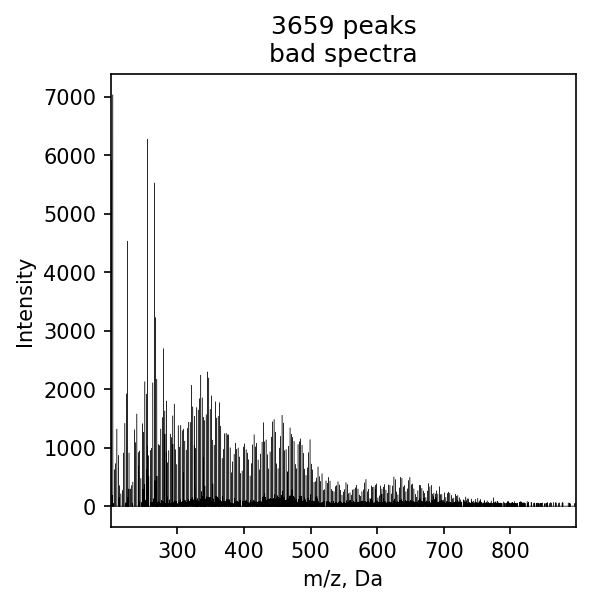

In [3]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'I'},
                            take_columns=['mass','I'],
                            sep='\t',
                            treshold=50
                            )
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
spec.draw(ax=ax, name='bad spectra')

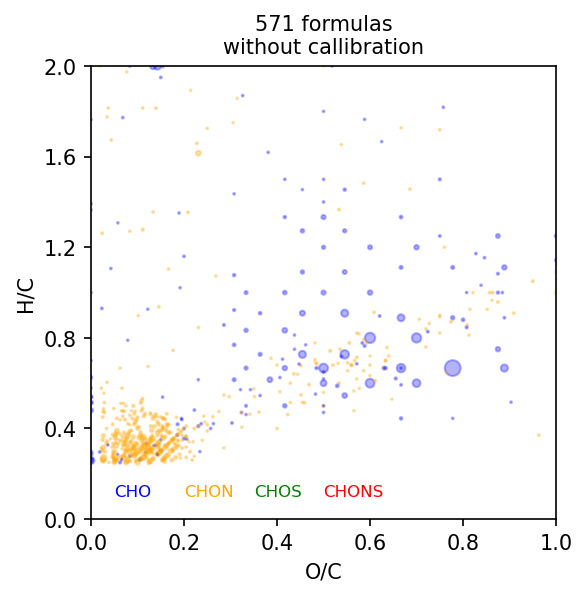

In [4]:
spec = spec.assign_dummy(elems='CHON', rel_error=0.5)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
vk = VanKrevelen(spec.table, name='without callibration')
vk.draw_scatter(ax=ax)

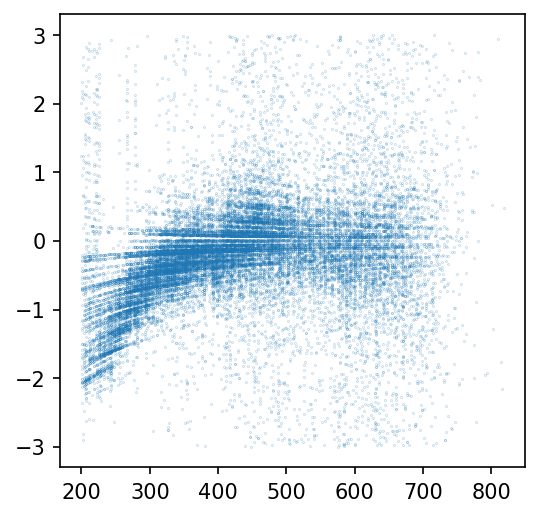

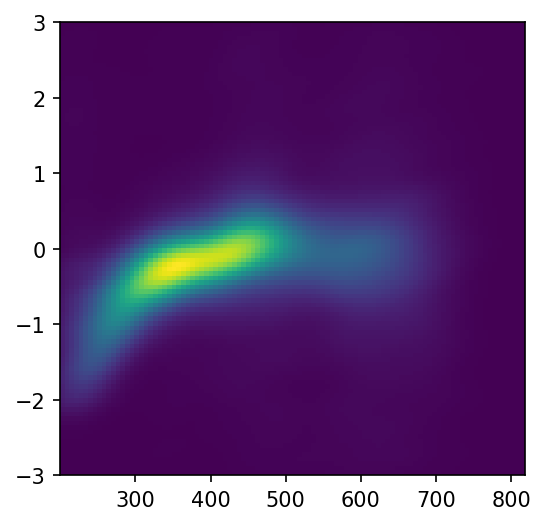

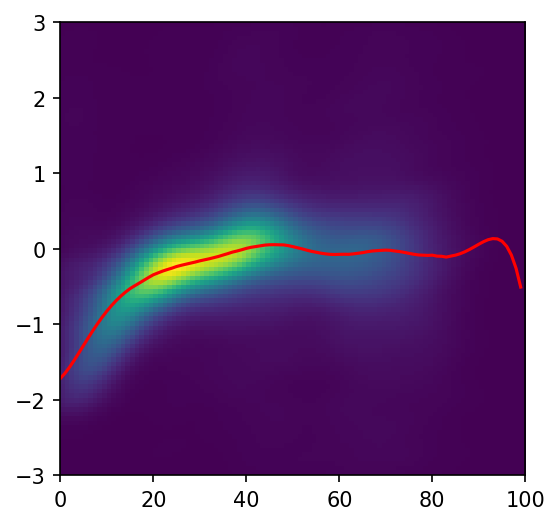

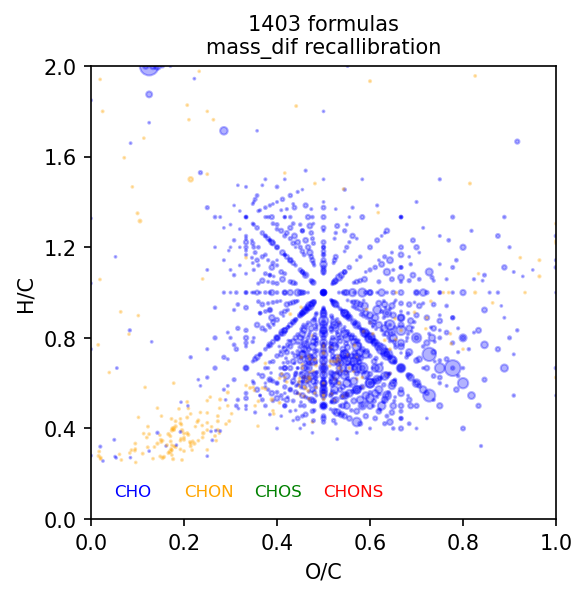

In [5]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'I'},
                            take_columns=['mass','I'],
                            sep='\t',
                            treshold=50
                            )

spec = spec.recallibrate_by_massdiff()
spec = spec.assign_dummy(elems='CHON', rel_error=0.5)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
vk = VanKrevelen(spec.table, name='mass_dif recallibration')
vk.draw_scatter(ax=ax)

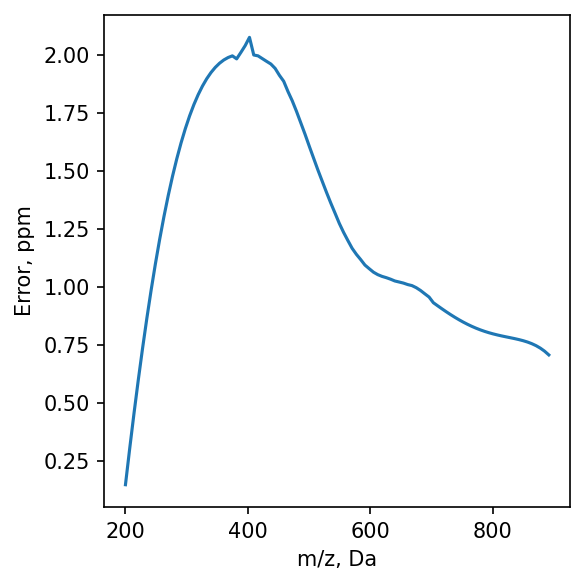

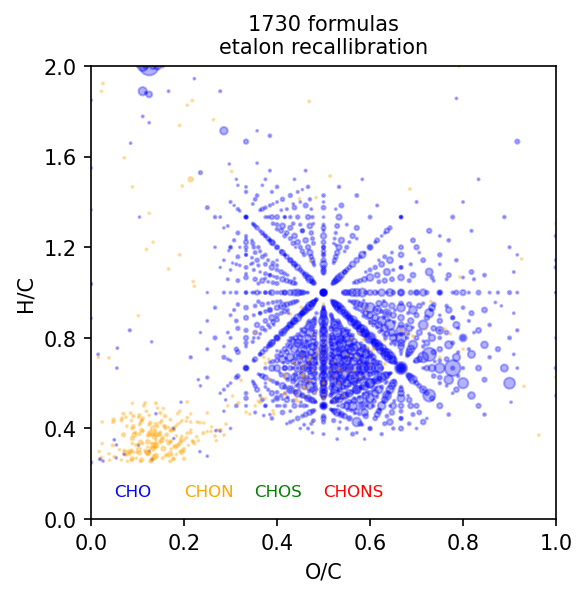

In [6]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'I'},
                            take_columns=['mass','I'],
                            sep='\t',
                            treshold=50
                            )

etalon = MassSpectrum().load(filename="data/etalon.csv",
                            mapper={'m/z':'mass', 'I':'I'},
                            take_columns=['mass','I'],
                            sep=',',
                            treshold=0
                            )

spec = spec.recallibrate_by_etalon(etalon)
spec = spec.assign_dummy(elems='CHON', rel_error=0.5)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
vk = VanKrevelen(spec.table, name='etalon recallibration')
vk.draw_scatter(ax=ax)

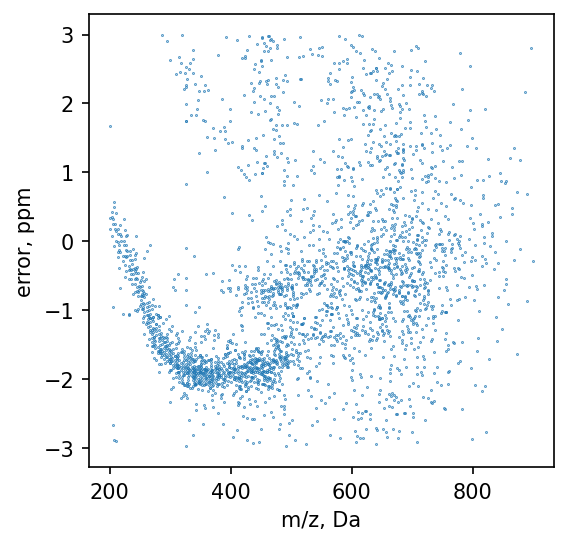

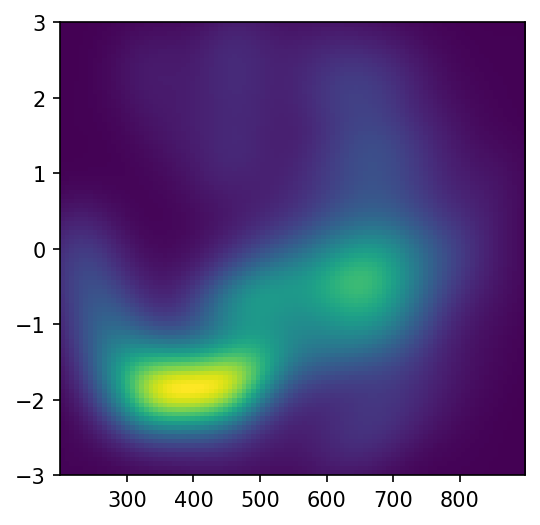

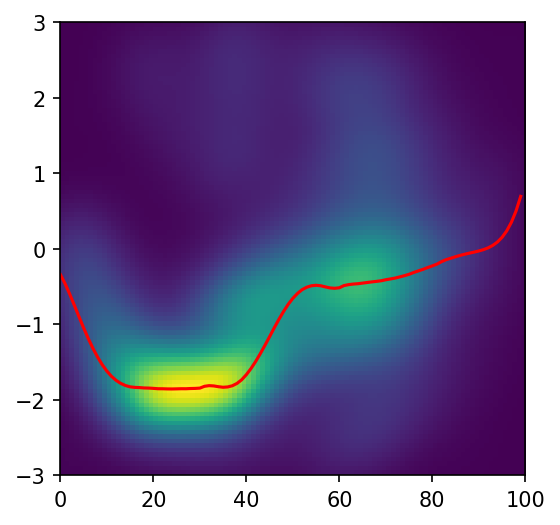

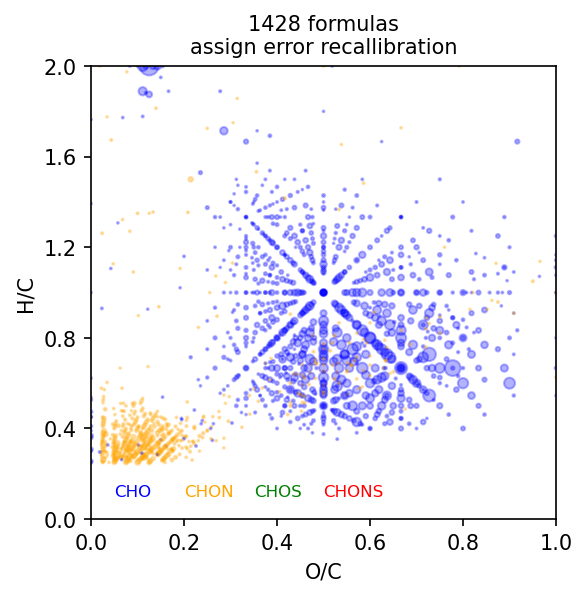

In [9]:
spec = MassSpectrum().load(filename="data/bad_masslist.txt",
                            mapper={'m/z':'mass', 'Intensity':'I'},
                            take_columns=['mass','I'],
                            sep='\t',
                            treshold=50
                            )

spec = spec.assign_dummy(elems='CHON', rel_error=3)
spec = spec.recallibrate_by_assign()
spec = spec.assign_dummy(elems='CHON', rel_error=0.5)
fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
vk = VanKrevelen(spec.table, name='assign error recallibration')
vk.draw_scatter(ax=ax)